<a href="https://colab.research.google.com/github/HeberthDCM/CUDA/blob/main/tulipan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install nvcc4jupyter
%load_ext nvcc4jupyter


The nvcc4jupyter extension is already loaded. To reload it, use:
  %reload_ext nvcc4jupyter


Cargar y convertir imagen

In [6]:
import numpy as np
import plotly.express as px
from PIL import Image

imagen = Image.open(".//tulipan.jpeg")
fig = px.imshow(imagen)
fig.show()
pixel = imagen.load()
print(pixel[0,0])

(0, 83, 192)


In [7]:
imagen_mat = np.array(list(imagen.getdata(band=0)), float)
print(imagen_mat)

imagen_mat.shape = (imagen.size[1], imagen.size[0])
print(imagen_mat)

print(imagen_mat.shape)


[  0.   0.   0. ... 204. 188. 194.]
[[  0.   0.   0. ...   9.  11.  15.]
 [  0.   0.   0. ...  11.  12.  17.]
 [  0.   0.   0. ...  12.  12.  18.]
 ...
 [176. 196. 224. ...  77. 110.  88.]
 [196. 221. 236. ... 152. 152. 135.]
 [223. 240. 235. ... 204. 188. 194.]]
(220, 449)


In [8]:
fig = px.imshow(imagen_mat, color_continuous_scale='gray')
fig.show()


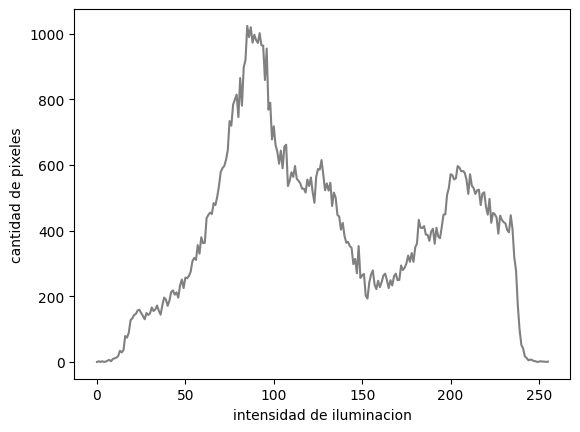

[[0.000e+00]
 [2.000e+00]
 [0.000e+00]
 [2.000e+00]
 [0.000e+00]
 [1.000e+00]
 [4.000e+00]
 [6.000e+00]
 [2.000e+00]
 [9.000e+00]
 [1.100e+01]
 [1.300e+01]
 [1.800e+01]
 [3.400e+01]
 [2.900e+01]
 [3.600e+01]
 [7.900e+01]
 [7.400e+01]
 [8.900e+01]
 [1.270e+02]
 [1.330e+02]
 [1.430e+02]
 [1.460e+02]
 [1.570e+02]
 [1.590e+02]
 [1.490e+02]
 [1.400e+02]
 [1.300e+02]
 [1.490e+02]
 [1.430e+02]
 [1.480e+02]
 [1.660e+02]
 [1.550e+02]
 [1.600e+02]
 [1.720e+02]
 [1.560e+02]
 [1.440e+02]
 [1.730e+02]
 [1.960e+02]
 [1.900e+02]
 [1.710e+02]
 [1.870e+02]
 [2.130e+02]
 [2.180e+02]
 [2.050e+02]
 [2.120e+02]
 [1.960e+02]
 [2.330e+02]
 [2.510e+02]
 [2.250e+02]
 [2.570e+02]
 [2.550e+02]
 [2.620e+02]
 [2.750e+02]
 [3.070e+02]
 [3.170e+02]
 [3.110e+02]
 [3.560e+02]
 [3.300e+02]
 [3.800e+02]
 [3.620e+02]
 [3.630e+02]
 [4.380e+02]
 [4.480e+02]
 [4.550e+02]
 [4.510e+02]
 [4.840e+02]
 [4.780e+02]
 [5.030e+02]
 [5.360e+02]
 [5.790e+02]
 [5.910e+02]
 [5.970e+02]
 [6.160e+02]
 [6.460e+02]
 [7.340e+02]
 [7.200e+02]

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imagen = cv2.imread("tulipan.jpeg", cv2.IMREAD_GRAYSCALE)
##cv2.imshow("tulipan.jpg", img)

hist = cv2.calcHist([imagen], [0], None, [256], [0, 256])
plt.plot(hist, color='gray' )

plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()
print(hist)

In [10]:
#list = hist.tolist()

np.hstack(hist.astype("i"))




array([   0,    2,    0,    2,    0,    1,    4,    6,    2,    9,   11,
         13,   18,   34,   29,   36,   79,   74,   89,  127,  133,  143,
        146,  157,  159,  149,  140,  130,  149,  143,  148,  166,  155,
        160,  172,  156,  144,  173,  196,  190,  171,  187,  213,  218,
        205,  212,  196,  233,  251,  225,  257,  255,  262,  275,  307,
        317,  311,  356,  330,  380,  362,  363,  438,  448,  455,  451,
        484,  478,  503,  536,  579,  591,  597,  616,  646,  734,  720,
        784,  799,  815,  746,  865,  781,  898,  920, 1024,  990, 1020,
        973,  997,  981,  972, 1002,  965,  964,  859,  955,  769,  790,
        678,  718,  661,  641,  604,  644,  590,  656,  662,  536,  552,
        578,  564,  597,  558,  552,  544,  528,  528,  516,  556,  536,
        562,  517,  485,  564,  588,  586,  615,  571,  523,  544,  522,
        546,  475,  516,  501,  448,  443,  403,  424,  384,  363,  366,
        353,  348,  298,  314,  270,  353,  256,  2

In [30]:
%%cuda
#include <iostream>
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>
//using namespace std;

//KERNEL
__global__ void Brillo(int *histograma, int *factor, int *histograma_resultado, int n){
	// identificador de hilo
	int myID = threadIdx.x;

	// escritura de resultados
	histograma_resultado[myID] = histograma[myID] + factor[myID];
}



int main(int argc, char** argv){
    //Declaraciones
    int *h_histograma, *h_histograma_resultado,*h_brillo,*h_contraste;
    int *d_histograma, *d_histograma_resultado,*d_brillo,*d_contrsate;
    int n=256;
    int brillo=5;
    int contraste=2;

    //Reserva de memoria de variable HOST
    h_histograma = (int*)malloc(n * sizeof(int));
    h_brillo = (int*)malloc(n * sizeof(int));
    h_histograma_resultado = (int*)malloc(n * sizeof(int));

    //Reserva de memoria de variables DEVICE
    cudaMalloc((void**)&d_histograma, n * sizeof(int));
    cudaMalloc((void**)&d_brillo, n * sizeof(int));
    cudaMalloc((void**)&d_histograma_resultado, n * sizeof(int));

    // Inicialización de variables
    int histograma[256]={  16,    3,    5,    5,    5,   15,   12,   16,   22,   22,   29, 33,   39,   56,   66,   70,   73,   87,  111,  122,  132,  167, 178,  179,  215,  220,  305,  338,  367,  384,  438,  469,  508,
        568,  629,  625,  750,  741,  808,  857,  905,  963, 1039, 1107, 1151, 1277, 1253, 1351, 1402, 1455, 1518, 1584, 1655, 1667, 1743, 1807, 1965, 2023, 2144, 2094, 2183, 2387, 2358, 2375, 2377, 2418, 2459, 2625, 2663, 2561, 2556, 2522, 2654, 2682, 2551, 2561, 2507,
       2601, 2463, 2476, 2477, 2435, 2278, 2239, 2162, 2108, 2032, 1955, 1959, 1944, 1917, 1830, 1793, 1862, 1780, 1741, 1736, 1743, 1771, 1761, 1805, 1775, 1752, 1727, 1733, 1763, 1687, 1741, 1728, 1703, 1729, 1699, 1723, 1729, 1750, 1663, 1579, 1457, 1425, 1367, 1320,
       1317, 1254, 1172, 1170, 1105,  976,  958,  937,  931,  906,  853, 909,  808,  817,  771,  846,  781,  770,  782,  773,  735,  803, 712,  750,  742,  732,  761,  691,  685,  699,  701,  709,  737, 765,  744,  734,  735,  793,  751,  769,  816,  824,  778,  875,
        839,  848,  881,  913,  919,  937,  936, 1008, 1012, 1031, 1021, 1079, 1103, 1020, 1137, 1083, 1084, 1157, 1152, 1171, 1180, 1183, 1160, 1241, 1220, 1174, 1214, 1272, 1260, 1229, 1165, 1197, 1196, 1186, 1048, 1241, 1120, 1100,  983,  903,  880,  768,  626,  516,
        454,  327,  250,  198,  137,  129,   95,   80,   76,   69,   67, 61,   59,   48,   34,   23,   20,   27,   26,   18,   11,   13,  7,   11,    8,   14,    6,    2,    2,    3,    3,    0,    1, 1,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
          0,    0,    0};
    for (int i = 0; i < n; i++){
		  h_brillo[i] = i;
      h_histograma_resultado[i]=0;
    }

    // cout<<histograma[100];

    //Transferencia de datos al DEVICE
    cudaMemcpy(d_histograma, h_histograma, n * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_brillo, h_brillo, n * sizeof(int), cudaMemcpyHostToDevice);

    //Lanzamiento de Kernel
    Brillo <<< 1, n >>>(d_histograma,d_brillo,d_histograma_resultado,n);


    // Transferencia de dato al HOST
    cudaMemcpy(h_histograma_resultado, d_histograma_resultado, n * sizeof(int), cudaMemcpyDeviceToHost);

    // Mostrar resultados
    printf("Histograma :\n");
    for (int i = 0; i < n; i++){
		  printf("%2d ", h_histograma[i]);
    }

    printf("\n");
    printf("Histograma resultado:\n");
    for (int i = 0; i < n; i++){
		  printf("%2d ", h_histograma_resultado[i]);
    }

    return 0;
}


Histograma :
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
Histograma resultado:
 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 6

In [18]:
%%cuda
// PROGRAMACIÓN EN CUDA C/C++
//
// includes
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>
// defines
#define N 16

int main(int argc, char** argv)
{
	// declaraciones
	float *hst_A, *hst_B; // punteros para direccionar los datos del host
	float *dev_A, *dev_B; // punteros para direccionar los datos del device

	// reserva en el host
	hst_A = (float*)malloc(N * sizeof(float)); // Reservar N bytes en memoria del host en el puntero hst_A
	hst_B = (float*)malloc(N * sizeof(float));

	// reserva en el device
	cudaMalloc((void**)&dev_A, N * sizeof(float)); // Reservar N bytes en memoria del device en el puntero dev_A
	cudaMalloc((void**)&dev_B, N * sizeof(float));

	// incializacion los datos (arrays) del host
	for (int i = 0; i<N; i++)
	{
		hst_A[i] = (float)rand() / RAND_MAX; // con números aleatorios entre 0 y 1
		hst_B[i] = 0; // con número 0
	}


	// copia de datos
	// de host a device
	cudaMemcpy(dev_A, hst_A, N * sizeof(float), cudaMemcpyHostToDevice);
	// en device entre variables
	cudaMemcpy(dev_B, dev_A, N * sizeof(float), cudaMemcpyDeviceToDevice);
	// de device a host
	cudaMemcpy(hst_B, dev_B, N * sizeof(float), cudaMemcpyDeviceToHost);

	// muestra de resultados
	printf("ENTRADA (hst_A):\n");
	for (int i = 0; i<N; i++)
		printf("%.2f ", hst_A[i]);
	printf("\n");
	printf("SALIDA (hst_B):\n");
	for (int i = 0; i<N; i++)
		printf("%.2f ", hst_B[i]);
	printf("\n");

	// liberacion de recursos
	cudaFree(dev_A);
	cudaFree(dev_B);

	// salida del programa
	printf("\n<pulsa [INTRO] para finalizar>\n");
	getchar();
	return 0;
}

ENTRADA (hst_A):
0.84 0.39 0.78 0.80 0.91 0.20 0.34 0.77 0.28 0.55 0.48 0.63 0.36 0.51 0.95 0.92 
SALIDA (hst_B):
0.84 0.39 0.78 0.80 0.91 0.20 0.34 0.77 0.28 0.55 0.48 0.63 0.36 0.51 0.95 0.92 

<pulsa [INTRO] para finalizar>



In [21]:
%%cuda
// includes
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>


//Kernel
__global__ void suma(int *vector_1, int *vector_2, int *vector_suma, int n)
{
	// identificador de hilo
	int myID = threadIdx.x;
	// generamos el vector 2
	vector_2[myID] = (n - 1) - myID;
	// escritura de resultados
	vector_suma[myID] = vector_1[myID] + vector_2[myID];
}

int main(int argc, char** argv)
{
	// declaraciones
	int *hst_vector1, *hst_vector2, *hst_resultado;
	int *dev_vector1, *dev_vector2, *dev_resultado;
	int n = 8;

	// reserva en el host
	hst_vector1 = (int*)malloc(n * sizeof(int));
	hst_vector2 = (int*)malloc(n * sizeof(int));
	hst_resultado = (int*)malloc(n * sizeof(int));

	// reserva en el device
	cudaMalloc((void**)&dev_vector1, n * sizeof(int));
	cudaMalloc((void**)&dev_vector2, n * sizeof(int));
	cudaMalloc((void**)&dev_resultado, n * sizeof(int));

	// inicializacion de vectores
	for (int i = 0; i < n; i++)
	{
		hst_vector1[i] = i;
		hst_vector2[i] = 0;
	}

	// copia de datos hacia el device
	cudaMemcpy(dev_vector1, hst_vector1, n * sizeof(int), cudaMemcpyHostToDevice);

	// LANZAMIENTO DEL KERNEL
	suma << < 1, n >> >(dev_vector1, dev_vector2, dev_resultado, n);

	// recogida de datos desde el device
	cudaMemcpy(hst_vector2, dev_vector2, n * sizeof(int), cudaMemcpyDeviceToHost);
	cudaMemcpy(hst_resultado, dev_resultado, n * sizeof(int), cudaMemcpyDeviceToHost);

	// impresion de resultados
	printf("VECTOR 1:\n");
	for (int i = 0; i < n; i++)
	{
		printf("%2d ", hst_vector1[i]);
	}
	printf("\n");
	printf("VECTOR 2:\n");
	for (int i = 0; i < n; i++)
	{
		printf("%2d ", hst_vector2[i]);
	}
	printf("\n");
	printf("SUMA:\n");
	for (int i = 0; i < n; i++)
	{
		printf("%2d ", hst_resultado[i]);
	}
	printf("\n");
	// salida
	printf("***************************************************\n");
	printf("<pulsa [INTRO] para finalizar>");
	getchar();
	return 0;
}

VECTOR 1:
 0  1  2  3  4  5  6  7 
VECTOR 2:
 7  6  5  4  3  2  1  0 
SUMA:
 7  7  7  7  7  7  7  7 
***************************************************
<pulsa [INTRO] para finalizar>
